In [1]:
import pandas as pd
import numpy as np

In [2]:
import pickle
with open('Tako_menus.pkl', 'rb') as f:
    data = pickle.load(f)

# 데이터 정제

값이 없는 키 삭제

In [3]:
data.pop(574)
data

{1: ['2022. 05. 16. (월)\n오후 08:50:22',
  '배달',
  '이연X의멘보샤(특제소스제공)\n2개',
  '┗ 4개',
  '乃乃타코야끼12알 [배달타코야끼 맛집]\n1개',
  '┗ 12알',
  '┗ 오리지널 (맛선택)'],
 2: ['2022. 05. 16. (월)\n오후 08:43:26',
  '배달',
  '[][]반반 타코야끼12알[][] [두가지맛]\n1개',
  '┗ 12알',
  '┗ 매콤양념 (맛선택)',
  '┗ 오리지널 (맛선택)',
  '[][]반반 타코야끼12알[][] [두가지맛]\n1개',
  '┗ 12알',
  '┗ 청양마요 (맛선택)',
  '┗ 안매운양념 (맛선택)'],
 3: ['2022. 05. 16. (월)\n오후 06:58:21',
  '배달',
  '[ 세가지맛 ] 타코야끼 36알\n1개',
  '┗ 36알',
  '┗ 바베큐 (맛선택)',
  '┗ 매콤양념 (맛선택)',
  '┗ 오리지널 (맛선택)'],
 4: ['2022. 05. 16. (월)\n오후 06:16:13',
  '배달',
  '치밥 도시락\n1개',
  '┗ 기본',
  '┗ 매콤양념치킨',
  '乃乃타코야끼12알 [배달타코야끼 맛집]\n1개',
  '┗ 12알',
  '┗ 오리지널 (맛선택)',
  '왕오징어튀김\n1개',
  '┗ 2개',
  '미니 떡볶이\n1개',
  '┗ 기본',
  '┗ 약한맛',
  '김말이 4개\n1개',
  '┗ 기본'],
 5: ['2022. 05. 16. (월)\n오후 05:42:10',
  '배달',
  '乃乃타코야끼12알 [배달타코야끼 맛집]\n1개',
  '┗ 12알',
  '┗ 오리지널 (맛선택)',
  '┗ ㄹl뷰 ㅇl벤트 (타코알 4알)',
  '[][]반반 타코야끼12알[][] [두가지맛]\n1개',
  '┗ 12알',
  '┗ 청양마요 (맛선택)',
  '┗ 파마산치즈+오리지널 (맛선택)',
  '┗ ㄹl뷰 ㅇl벤트 (타코알 4알)'],
 6: ['2022. 05. 16. (월

주문 메뉴만 추출

In [7]:
menus = {}
for i in data:
    if data[i][1] == '배달':
        menus[i] = data[i][2:]
    else:
        menus[i] = data[i][1:]

menus

{1: ['이연X의멘보샤(특제소스제공)\n2개',
  '┗ 4개',
  '乃乃타코야끼12알 [배달타코야끼 맛집]\n1개',
  '┗ 12알',
  '┗ 오리지널 (맛선택)'],
 2: ['[][]반반 타코야끼12알[][] [두가지맛]\n1개',
  '┗ 12알',
  '┗ 매콤양념 (맛선택)',
  '┗ 오리지널 (맛선택)',
  '[][]반반 타코야끼12알[][] [두가지맛]\n1개',
  '┗ 12알',
  '┗ 청양마요 (맛선택)',
  '┗ 안매운양념 (맛선택)'],
 3: ['[ 세가지맛 ] 타코야끼 36알\n1개',
  '┗ 36알',
  '┗ 바베큐 (맛선택)',
  '┗ 매콤양념 (맛선택)',
  '┗ 오리지널 (맛선택)'],
 4: ['치밥 도시락\n1개',
  '┗ 기본',
  '┗ 매콤양념치킨',
  '乃乃타코야끼12알 [배달타코야끼 맛집]\n1개',
  '┗ 12알',
  '┗ 오리지널 (맛선택)',
  '왕오징어튀김\n1개',
  '┗ 2개',
  '미니 떡볶이\n1개',
  '┗ 기본',
  '┗ 약한맛',
  '김말이 4개\n1개',
  '┗ 기본'],
 5: ['乃乃타코야끼12알 [배달타코야끼 맛집]\n1개',
  '┗ 12알',
  '┗ 오리지널 (맛선택)',
  '┗ ㄹl뷰 ㅇl벤트 (타코알 4알)',
  '[][]반반 타코야끼12알[][] [두가지맛]\n1개',
  '┗ 12알',
  '┗ 청양마요 (맛선택)',
  '┗ 파마산치즈+오리지널 (맛선택)',
  '┗ ㄹl뷰 ㅇl벤트 (타코알 4알)'],
 6: ['[][]반반 타코야끼12알[][] [두가지맛]\n1개',
  '┗ 12알',
  '┗ 소떡소떡 1개',
  '┗ 오리지널 (맛선택)',
  '┗ 매콤양념 (맛선택)',
  '왕오징어튀김\n1개',
  '┗ 2개'],
 7: ['타코야끼12알 + 치밥 도시락 + 음료1\n1개',
  '┗ 기본',
  '┗ 오리지널 (맛선택)',
  '┗ ㄹl뷰 ㅇl벤트 (타코알 4알)',
  '┗ 직화양념(매콤) 지코X스타일',
  '┗

In [13]:
menu_main = ['치밥', '야끼만두', '게맛살', '멘보샤', '해쉬브라운', '우유튀김', '왕오징어튀김',
             '모듬튀김', '치즈스틱', '고구마튀김', '왕새우튀김', '김말이', '수제돈까스', '쿨피스', '펩시콜라', '사이다', '오란씨',
             '토핑추가', '떡볶이', '계란찜', '미니오뎅탕', '소떡소떡', '스노윙 치즈볼', '허니버터 치즈볼', '오뎅튀김',
             '셀프주먹밥', '한입핫도그', '생수', '카스', '테라', '참이슬', '진로', '시원']
menu_eng = ['Chibab', 'Yakimandu', 'Crab', 'Menbo', 'Hashbrown', 'milkfries', 'FriedSquid',
             'FriesSet', 'CheeseStick', 'SPFries', 'FriedShrimp', 'Kimmari', 'Donkats', 'Coolpeace', 'Pepsi', 'Cider', 'OranC',
             'Toppings', 'Teokboki', 'Gyeranzzim', 'Odengtang', 'Sotteock', 'Cheeseball', 'Cheeseball', 'FriedOdeng',
             'Selfjumeokbab', 'miniHotdog', 'Water', 'Cass', 'Tera', 'Chamisl', 'Jinro', 'Siwon']

menu_list = {}

for k, v in menus.items():
    menu_list[k] = []
    for e in v:
        for m, eng in zip(menu_main, menu_eng):
            if m in e:
                if m not in menu_list[k]:
                    menu_list[k].append(eng)
basket = []
for b in menu_list.values():
    if b == []:
        pass
    else:
        basket.append(b)
basket

[['Menbo'],
 ['Chibab', 'FriedSquid', 'Teokboki', 'Kimmari'],
 ['Sotteock', 'FriedSquid'],
 ['Chibab', 'Pepsi'],
 ['FriesSet'],
 ['milkfries'],
 ['SPFries'],
 ['Chamisl'],
 ['Chibab'],
 ['Chibab', 'FriedShrimp'],
 ['Selfjumeokbab', 'Pepsi'],
 ['Teokboki', 'FriedSquid'],
 ['Teokboki', 'Sotteock', 'Pepsi'],
 ['Hashbrown', 'FriedSquid'],
 ['FriedShrimp'],
 ['Crab', 'Odengtang'],
 ['Sotteock', 'Toppings'],
 ['Coolpeace', 'FriedSquid'],
 ['Menbo'],
 ['Selfjumeokbab', 'Gyeranzzim'],
 ['Teokboki', 'Coolpeace'],
 ['Chibab', 'Pepsi'],
 ['Chibab'],
 ['Sotteock'],
 ['Menbo'],
 ['Coolpeace', 'Selfjumeokbab'],
 ['Coolpeace', 'Coolpeace'],
 ['Selfjumeokbab', 'Sotteock'],
 ['Chibab', 'Coolpeace'],
 ['Chibab', 'Sotteock'],
 ['Pepsi', 'Sotteock'],
 ['Chibab', 'Pepsi'],
 ['CheeseStick', 'Coolpeace'],
 ['CheeseStick', 'Toppings'],
 ['Chibab', 'Sotteock'],
 ['Sotteock', 'Pepsi', 'Menbo'],
 ['Chibab', 'Coolpeace'],
 ['Chibab', 'Pepsi', 'Toppings'],
 ['Menbo'],
 ['Chibab', 'Sotteock', 'Coolpeace'],
 ['Chiba

In [14]:
# apriori 알고리즘
from mlxtend.frequent_patterns import apriori, association_rules
# 연관분석용 데이터 파일 변환
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
te = TransactionEncoder()
ted = te.fit(basket).transform(basket)
ted

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [16]:
df = pd.DataFrame(ted, columns=te.columns_)
df

,Cass,Chamisl,CheeseStick,Cheeseball,Chibab,Cider,Coolpeace,Crab,FriedOdeng,FriedShrimp,...,SPFries,Selfjumeokbab,Sotteock,Teokboki,Tera,Toppings,Water,Yakimandu,milkfries,miniHotdog
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
444,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
445,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
446,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


## 2. 탐색적 데이터 분석

In [200]:
freq = df.sum().to_frame('Frequency')
freq_sort = freq.sort_values('Frequency', ascending = False)
print(freq_sort)

               Frequency
Coolpeace            147
Chibab               137
Pepsi                123
Teokboki             104
Sotteock              48
Menbo                 37
Toppings              36
FriedShrimp           24
Hashbrown             23
milkfries             23
Selfjumeokbab         22
miniHotdog            21
FriedSquid            20
Kimmari               19
Cider                 18
Cheeseball            16
OranC                 11
FriedOdeng            11
FriesSet              10
Odengtang              9
SPFries                9
Yakimandu              9
Gyeranzzim             8
Crab                   8
Chamisl                6
CheeseStick            6
Jinro                  3
Cass                   3
Tera                   1
Water                  1


In [201]:
freq_sort['Support'] = freq_sort['Frequency'] / len(df)
print(freq_sort)

               Frequency   Support
Coolpeace            147  0.328125
Chibab               137  0.305804
Pepsi                123  0.274554
Teokboki             104  0.232143
Sotteock              48  0.107143
Menbo                 37  0.082589
Toppings              36  0.080357
FriedShrimp           24  0.053571
Hashbrown             23  0.051339
milkfries             23  0.051339
Selfjumeokbab         22  0.049107
miniHotdog            21  0.046875
FriedSquid            20  0.044643
Kimmari               19  0.042411
Cider                 18  0.040179
Cheeseball            16  0.035714
OranC                 11  0.024554
FriedOdeng            11  0.024554
FriesSet              10  0.022321
Odengtang              9  0.020089
SPFries                9  0.020089
Yakimandu              9  0.020089
Gyeranzzim             8  0.017857
Crab                   8  0.017857
Chamisl                6  0.013393
CheeseStick            6  0.013393
Jinro                  3  0.006696
Cass                

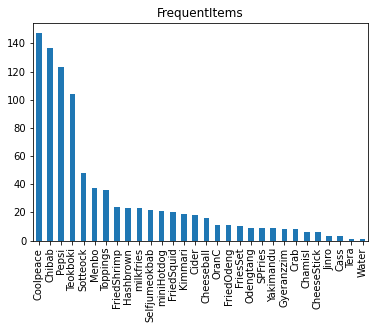

In [202]:
freq_sort['Frequency'].plot(kind='bar', title='FrequentItems');

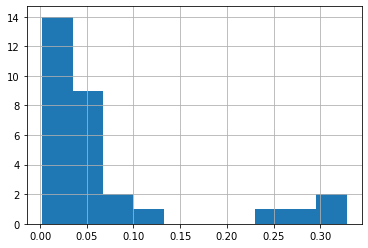

In [203]:
freq_sort['Support'].hist();

## 3. 연관규칙 생성

In [19]:
freq_items = apriori(df, min_support=0.01, use_colnames=True)
print(freq_items)

     support                       itemsets
0   0.013393                      (Chamisl)
1   0.013393                  (CheeseStick)
2   0.035714                   (Cheeseball)
3   0.305804                       (Chibab)
4   0.040179                        (Cider)
..       ...                            ...
57  0.015625      (Teokboki, Selfjumeokbab)
58  0.017857           (Sotteock, Teokboki)
59  0.011161           (Teokboki, Toppings)
60  0.011161         (Teokboki, miniHotdog)
61  0.011161  (Teokboki, Coolpeace, Chibab)

[62 rows x 2 columns]


In [20]:
rules = association_rules(freq_items, metric = 'confidence', min_threshold = 0.5)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gyeranzzim),(Chibab),0.017857,0.305804,0.011161,0.625000,2.043796,0.005700,1.851190
1,(Crab),(Pepsi),0.017857,0.274554,0.011161,0.625000,2.276423,0.006258,1.934524
2,(Kimmari),(Teokboki),0.042411,0.232143,0.022321,0.526316,2.267206,0.012476,1.621032
3,"(Teokboki, Chibab)",(Coolpeace),0.022321,0.328125,0.011161,0.500000,1.523810,0.003836,1.343750


In [21]:
rules = rules[(rules['lift'] > 1)]
rules.sort_values(by = 'confidence', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gyeranzzim),(Chibab),0.017857,0.305804,0.011161,0.625000,2.043796,0.005700,1.851190
1,(Crab),(Pepsi),0.017857,0.274554,0.011161,0.625000,2.276423,0.006258,1.934524
2,(Kimmari),(Teokboki),0.042411,0.232143,0.022321,0.526316,2.267206,0.012476,1.621032
3,"(Teokboki, Chibab)",(Coolpeace),0.022321,0.328125,0.011161,0.500000,1.523810,0.003836,1.343750


- 조건부에 '치밥'이 있는 규칙

In [22]:
rules[rules.antecedents.apply(lambda x:'Chibab' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,"(Teokboki, Chibab)",(Coolpeace),0.022321,0.328125,0.011161,0.5,1.52381,0.003836,1.34375


In [208]:
rules[rules.antecedents.apply(lambda x:'Gyeranzzim' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gyeranzzim),(Chibab),0.017857,0.305804,0.011161,0.625,2.043796,0.0057,1.85119


- 결론구에 '치밥'이 있는 규칙

In [209]:
rules[rules.consequents.apply(lambda x:'Chibab' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gyeranzzim),(Chibab),0.017857,0.305804,0.011161,0.625,2.043796,0.0057,1.85119
